Project details -

Aim -

Each year millions of people die in traffic accidents, not to mention an additional number of people that are injured or disabled. If the locations of traffic accidents could be predicted, this could have a huge beneficial impact in potentially helping to reduce their number each year. It could also be useful in an insurance context, in order to predict risk, as well as for governments and local road authorities looking to create more efficient systems of road maintenance and improvements. The aim of this project is to predict where traffic accidents are likely to occur.

Methodology -

Our model uses a combination of accident, population density and traffic data from the UK, where we focused on accidents in London. Different machine learning models were built to see if the level of accident severity could be predicted.

Results -

Our findings showed that being able to predict accident severity was quite difficult due to the imbalance between slight, serious, and fatal accidents (58% accuracy). There were several promising options to improve the model further, beyond this initial proof of concept.
Overall, we were able to demonstrate that this can easily be achieved and with the improvment of techonology and involvement of other techniques the prediction could be increased drastically.

Notebook structure -

The following notebooks show the steps we took in order to reach these findings -
01. Cleaning the accident data
02. Cleaning the traffic and population density data and merging this with the accident data.
03. Exploring the geographical distribution of the data, and comparing the characteristics of accidents of different levels of severity
04. Exploring the changes in accident numbers over time, and investigating various other features of the accident dataset where in our model predicted traffic accident severity with structured data.

Cleaning the traffic accident dataset -

In this notebook, the dataset on traffic accidents in England and Wales from 2013-2017 will be cleaned and pre-processed.
Source - https://data.gov.uk/dataset/cb7ae6f0-4be6-4935-9277-47e5ce24a11f/road-safety-data

In [67]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
import urllib, os
import glob
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, auc, roc_curve, classification_report
import warnings
warnings.filterwarnings("ignore")

In [68]:
accidents_df = pd.concat([pd.read_csv(f) for f in glob.glob('Data/01. Accidents/Accidents*.csv')], ignore_index = True)

In [69]:
len(accidents_df)

691641

In [70]:
accidents_df.head()

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location
0,201301BS70003,527060.0,177970.0,-0.171402,51.486361,1,2,2,1,02/01/2013,...,0,0,1,1,1,0,0,1,1,E01002844
1,201301BS70005,526900.0,178940.0,-0.173356,51.495115,1,3,1,2,04/01/2013,...,0,5,1,8,1,0,0,1,1,E01002821
2,201301BS70006,524240.0,181460.0,-0.210767,51.518353,1,3,1,1,07/01/2013,...,0,1,1,1,1,0,0,1,1,E01002878
3,201301BS70007,524320.0,181290.0,-0.209675,51.516808,1,3,2,1,10/01/2013,...,0,5,1,1,1,0,0,1,1,E01002831
4,201301BS70009,525450.0,178660.0,-0.194332,51.492922,1,3,2,1,04/01/2013,...,0,0,4,1,1,0,0,1,1,E01002851


In [71]:
accidents_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 691641 entries, 0 to 691640
Data columns (total 32 columns):
 #   Column                                       Non-Null Count   Dtype  
---  ------                                       --------------   -----  
 0   Accident_Index                               691641 non-null  object 
 1   Location_Easting_OSGR                        691588 non-null  float64
 2   Location_Northing_OSGR                       691588 non-null  float64
 3   Longitude                                    691578 non-null  float64
 4   Latitude                                     691578 non-null  float64
 5   Police_Force                                 691641 non-null  int64  
 6   Accident_Severity                            691641 non-null  int64  
 7   Number_of_Vehicles                           691641 non-null  int64  
 8   Number_of_Casualties                         691641 non-null  int64  
 9   Date                                         691641 non-nul

Cleaning the dataset -

In [72]:
# Accident Severity should be object
# Date to date_time
# Day_of_Week to object
# Time to date_time
# 1st/2nd_Road_Class is object but are numbers
# Note Road_Type is object but are numbers
# Junction_Detail is float but should be objects
# Junction_Control is object but are numbers
# Light/Weather/Road_Surface_Conditions/Special_Conditions_at_Site/Carriageway_Hazards are objects but numbers
# Urban_or_Rural_Area is int should be strings
drop_list = ['Police_Force', 'Local_Authority_(District)', 'Local_Authority_(Highway)', 
             '1st_Road_Number', '2nd_Road_Number', 'Pedestrian_Crossing-Human_Control', 
             'Pedestrian_Crossing-Physical_Facilities','Did_Police_Officer_Attend_Scene_of_Accident']
accidents_df = accidents_df.drop(labels=drop_list, axis=1)
accidents_df.shape

(691641, 24)

Cleaning null values -

In [73]:
accidents_df.isna().sum()/len(accidents_df)

Accident_Index                0.000000
Location_Easting_OSGR         0.000077
Location_Northing_OSGR        0.000077
Longitude                     0.000091
Latitude                      0.000091
Accident_Severity             0.000000
Number_of_Vehicles            0.000000
Number_of_Casualties          0.000000
Date                          0.000000
Day_of_Week                   0.000000
Time                          0.000045
1st_Road_Class                0.000000
Road_Type                     0.000000
Speed_limit                   0.000053
Junction_Detail               0.000000
Junction_Control              0.000000
2nd_Road_Class                0.000000
Light_Conditions              0.000000
Weather_Conditions            0.000000
Road_Surface_Conditions       0.000000
Special_Conditions_at_Site    0.000000
Carriageway_Hazards           0.000000
Urban_or_Rural_Area           0.000000
LSOA_of_Accident_Location     0.062778
dtype: float64

In [74]:
accidents_df.Speed_limit.fillna(accidents_df.Speed_limit.median(), inplace=True)

Correcting dtypes and labels -

In [75]:
accidents_df.Accident_Severity.value_counts(normalize=True)

3    0.836837
2    0.151230
1    0.011932
Name: Accident_Severity, dtype: float64

In [76]:
accidents_df.Accident_Severity = accidents_df.Accident_Severity.replace([1,2,3], ['Fatal', 'Serious', 'Slight'])

In [77]:
accidents_df['Date'] = pd.to_datetime(accidents_df['Date'], format='%d/%m/%Y')

In [78]:
accidents_df['Hour'] = pd.to_datetime(accidents_df['Time'], format='%H:%M').dt.hour

In [79]:
accidents_df = accidents_df.drop('Time', axis=1)

In [80]:
accidents_df.Hour.fillna(accidents_df.Hour.median(), inplace=True)

In [81]:
accidents_df.Hour = accidents_df.Hour.astype('int')

In [82]:
def two_hour_groupings(hour):
    '''Creates two hour bins from Hour column'''
    if hour >= 0 and hour < 2:
        return '12am-2am'
    if hour >= 2 and hour < 4:
        return '2am-4am'
    if hour >= 4 and hour < 6:
        return '4am-6am'
    if hour >= 6 and hour < 8:
        return '6am-8am'
    if hour >= 8 and hour < 10:
        return '8am-10am'
    if hour >= 10 and hour < 12:
        return '10am-12pm'
    if hour >= 12 and hour < 14:
        return '12pm-2pm'
    if hour >= 14 and hour < 16:
        return '2pm-4pm'
    if hour >= 16 and hour < 18:
        return '4pm-6pm'
    if hour >= 18 and hour < 20:
        return '6pm-8pm'
    if hour >= 20 and hour < 22:
        return '8pm-10pm'
    if hour >= 22 and hour < 24:
        return '10pm-12am'

In [83]:
accidents_df['Two_Hour_Groupings'] = accidents_df['Hour'].apply(two_hour_groupings)

In [84]:
def Hour_to_groups(hour):
    if hour >= 5 and hour < 10:
        return 'Morning'
    elif hour >= 10 and hour < 15:
        return 'Office hours'
    elif hour >= 15 and hour < 19:
        return 'Rush hour'
    elif hour >= 19 and hour < 23:
        return 'Evening'
    else:
        return 'Night'

In [85]:
accidents_df['Time_of_Day'] = accidents_df['Hour'].apply(Hour_to_groups)

In [86]:
accidents_df.Day_of_Week.value_counts(normalize=True)

6    0.163672
5    0.152089
3    0.151223
4    0.150698
2    0.141935
7    0.130423
1    0.109960
Name: Day_of_Week, dtype: float64

In [87]:
accidents_df.Day_of_Week = accidents_df.Day_of_Week.replace([1,2,3,4,5,6,7], 
                                 ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'])

In [88]:
accidents_df['1st_Road_Class'].value_counts(normalize=True)

3    0.454639
6    0.306250
4    0.123197
5    0.077224
1    0.035877
2    0.002814
Name: 1st_Road_Class, dtype: float64

In [89]:
accidents_df['1st_Road_Class'] = accidents_df['1st_Road_Class'].replace([1,2,3,4,5,6], 
                                                                        ['Motorway', 'A(M)', 'A', 'B', 
                                                                         'C', 'Unclassified'])
accidents_df['1st_Road_Class'] = accidents_df['1st_Road_Class'].replace('A(M)', 'Motorway')
accidents_df['1st_Road_Class'].value_counts(normalize=True)

A               0.454639
Unclassified    0.306250
B               0.123197
C               0.077224
Motorway        0.038691
Name: 1st_Road_Class, dtype: float64

In [90]:
accidents_df.Road_Type.value_counts(normalize=True)

 6    0.745468
 3    0.146459
 1    0.067383
 2    0.021767
 7    0.010601
 9    0.008321
-1    0.000001
Name: Road_Type, dtype: float64

In [91]:
accidents_df.Road_Type = accidents_df.Road_Type.replace([1,2,3,6,7,9,-1], 
                               ['Roundabout', 'One way street', 'Dual carriageway', 'Single carriageway', 
                                'Slip road', 'Single carriageway', 'Single carriageway'])
accidents_df.Road_Type.value_counts(normalize=True)

Single carriageway    0.753790
Dual carriageway      0.146459
Roundabout            0.067383
One way street        0.021767
Slip road             0.010601
Name: Road_Type, dtype: float64

In [92]:
accidents_df.Junction_Detail.value_counts(normalize=True)

 0    0.401522
 3    0.316150
 6    0.097717
 1    0.087626
 8    0.034965
 9    0.025311
 5    0.014574
 2    0.012800
 7    0.008289
-1    0.001047
Name: Junction_Detail, dtype: float64

In [93]:
accidents_df.Junction_Detail = accidents_df.Junction_Detail.replace([0,1,2,3,5,6,7,8,9,-1], 
                                                                    ['Not at junction or within 20 meters', 
                                                                     'Roundabout', 'Mini-roundabout', 
                                                                     'T or staggered junction', 'Slip road', 
                                                                     'Crossroads', 
                                                                     'More than 4 arms (not roundabout)', 
                                                                     'Private drive or entrance', 'Other junction', 
                                                                     'Not at junction or within 20 meters'])
accidents_df.Junction_Detail.value_counts(normalize=True)

Not at junction or within 20 meters    0.402569
T or staggered junction                0.316150
Crossroads                             0.097717
Roundabout                             0.087626
Private drive or entrance              0.034965
Other junction                         0.025311
Slip road                              0.014574
Mini-roundabout                        0.012800
More than 4 arms (not roundabout)      0.008289
Name: Junction_Detail, dtype: float64

In [94]:
accidents_df.Junction_Control.value_counts(normalize=True)

 4    0.482139
-1    0.405216
 2    0.105125
 3    0.005081
 1    0.001878
 0    0.000561
Name: Junction_Control, dtype: float64

In [95]:
accidents_df.Junction_Control = accidents_df.Junction_Control.replace([0,1,2,3,4,-1], 
                                                                      ['Not at junction or within 20 metres', 
                                                                       'Authorised person', 'Auto traffic signal', 
                                                                       'Stop sign', 'Give way or uncontrolled', 
                                                                       'Data missing or out of range'])
accidents_df.Junction_Control.value_counts(normalize=True)

Give way or uncontrolled               0.482139
Data missing or out of range           0.405216
Auto traffic signal                    0.105125
Stop sign                              0.005081
Authorised person                      0.001878
Not at junction or within 20 metres    0.000561
Name: Junction_Control, dtype: float64

In [96]:
accidents_df = accidents_df.drop('Junction_Control', axis=1)

In [97]:
accidents_df['2nd_Road_Class'].value_counts(normalize=True)

 6    0.406821
-1    0.406115
 3    0.098274
 5    0.042593
 4    0.039237
 1    0.006246
 2    0.000714
Name: 2nd_Road_Class, dtype: float64

In [98]:
accidents_df['2nd_Road_Class'] = accidents_df['2nd_Road_Class'].replace([1,2,3,4,5,6,-1], 
                                                                        ['Motorway', 'A(M)', 'A', 'B', 'C', 
                                                                         'Unclassified', 
                                                                         'Not at junction or within 20 meters'])
# Combining A(M) (motorway sections of A roads) into the motorway category
accidents_df['2nd_Road_Class'] = accidents_df['2nd_Road_Class'].replace('A(M)', 'Motorway')
accidents_df['2nd_Road_Class'].value_counts(normalize=True)

Unclassified                           0.406821
Not at junction or within 20 meters    0.406115
A                                      0.098274
C                                      0.042593
B                                      0.039237
Motorway                               0.006960
Name: 2nd_Road_Class, dtype: float64

In [99]:
accidents_df.Light_Conditions.value_counts(normalize=True)

 1    0.728686
 4    0.198545
 6    0.051253
 7    0.015485
 5    0.006010
-1    0.000020
Name: Light_Conditions, dtype: float64

In [100]:
accidents_df.Light_Conditions = accidents_df.Light_Conditions.replace([1,4,5,6,7,-1], 
                                                      ['Daylight', 
                                                       'Darkness - lights lit', 
                                                       'Darkness - lights unlit', 
                                                       'Darkness - no lighting', 
                                                       'Darkness - lighting unknown', 
                                                       'Daylight'])

accidents_df.Light_Conditions.value_counts(normalize=True)

Daylight                       0.728706
Darkness - lights lit          0.198545
Darkness - no lighting         0.051253
Darkness - lighting unknown    0.015485
Darkness - lights unlit        0.006010
Name: Light_Conditions, dtype: float64

In [101]:
accidents_df.Weather_Conditions.value_counts(normalize=True)

 1    0.812651
 2    0.110719
 9    0.022883
 8    0.016841
 5    0.013507
 4    0.012032
 3    0.005047
 7    0.004920
 6    0.001378
-1    0.000020
Name: Weather_Conditions, dtype: float64

In [102]:
accidents_df.Weather_Conditions = accidents_df.Weather_Conditions.replace([1,2,3,4,5,6,7,8,9,-1], 
                                                                ['Fine no high winds', 
                                                                 'Raining no high winds', 
                                                                 'Snowing no high winds', 
                                                                 'Fine + high winds', 
                                                                 'Raining + high winds', 
                                                                 'Snowing + high winds', 
                                                                 'Fog or mist', 'Other', 'Fine no high winds', 
                                                                 'Fine no high winds'])
accidents_df.Weather_Conditions.value_counts(normalize=True)

Fine no high winds       0.835555
Raining no high winds    0.110719
Other                    0.016841
Raining + high winds     0.013507
Fine + high winds        0.012032
Snowing no high winds    0.005047
Fog or mist              0.004920
Snowing + high winds     0.001378
Name: Weather_Conditions, dtype: float64

In [103]:
accidents_df.Road_Surface_Conditions.value_counts(normalize=True)

 1    0.711846
 2    0.262678
 4    0.014380
-1    0.005018
 3    0.004780
 5    0.001297
Name: Road_Surface_Conditions, dtype: float64

In [104]:
accidents_df.Road_Surface_Conditions = accidents_df.Road_Surface_Conditions.replace([1,2,3,4,5,-1], 
                                                                                    ['Dry', 
                                                                                     'Wet or damp', 
                                                                                     'Snow', 
                                                                                     'Frost or ice', 
                                                                                     'Flood over 3cm. deep', 
                                                                                     'Dry'])
accidents_df.Road_Surface_Conditions.value_counts(normalize=True)

Dry                     0.716865
Wet or damp             0.262678
Frost or ice            0.014380
Snow                    0.004780
Flood over 3cm. deep    0.001297
Name: Road_Surface_Conditions, dtype: float64

In [105]:
accidents_df.Special_Conditions_at_Site.value_counts(normalize=True)

 0    0.974209
 4    0.010630
-1    0.004074
 7    0.002822
 6    0.002568
 5    0.002251
 1    0.001822
 3    0.001229
 2    0.000395
Name: Special_Conditions_at_Site, dtype: float64

In [106]:
accidents_df.Special_Conditions_at_Site = \
accidents_df.Special_Conditions_at_Site.replace([0,1,2,3,4,5,6,7,-1],  
                                                ['None', 'Auto traffic singal - out', 
                                                 'Auto signal part defective', 
                                                 'Road sign or marking defective or obscured', 
                                                 'Roadworks', 'Road surface defective', 
                                                 'Oil or diesel', 'Mud', 'None'])

accidents_df.Special_Conditions_at_Site.value_counts(normalize=True)

None                                          0.978284
Roadworks                                     0.010630
Mud                                           0.002822
Oil or diesel                                 0.002568
Road surface defective                        0.002251
Auto traffic singal - out                     0.001822
Road sign or marking defective or obscured    0.001229
Auto signal part defective                    0.000395
Name: Special_Conditions_at_Site, dtype: float64

In [107]:
accidents_df.Carriageway_Hazards.value_counts(normalize=True)

 0    0.979288
 2    0.007258
 7    0.004437
-1    0.003928
 6    0.002380
 3    0.001413
 1    0.001295
Name: Carriageway_Hazards, dtype: float64

In [108]:
accidents_df.Carriageway_Hazards = \
accidents_df.Carriageway_Hazards.replace([0,1,2,3,6,7,-1],  
                                                ['None', 'Vehicle load on road', 
                                                 'Other object on road', 
                                                 'Previous accident',  
                                                 'Pedestrian in carriageway - not injured', 
                                                 'Any animal in carriageway (except ridden horse)', 
                                                 'None'])

accidents_df.Carriageway_Hazards.value_counts(normalize=True)

None                                               0.983217
Other object on road                               0.007258
Any animal in carriageway (except ridden horse)    0.004437
Pedestrian in carriageway - not injured            0.002380
Previous accident                                  0.001413
Vehicle load on road                               0.001295
Name: Carriageway_Hazards, dtype: float64

In [109]:
accidents_df.Urban_or_Rural_Area.value_counts(normalize=True)

1    0.656437
2    0.343538
3    0.000025
Name: Urban_or_Rural_Area, dtype: float64

In [110]:
accidents_df.Urban_or_Rural_Area = accidents_df.Urban_or_Rural_Area.replace([1,2,3], ['Urban', 'Rural', 'Urban'])
accidents_df.Urban_or_Rural_Area.value_counts(normalize=True)

Urban    0.656462
Rural    0.343538
Name: Urban_or_Rural_Area, dtype: float64

In [111]:
accidents_df = accidents_df.dropna()

In [112]:
accidents_df.columns.groupby(accidents_df.dtypes)

{dtype('int64'): Index(['Number_of_Vehicles', 'Number_of_Casualties'], dtype='object'),
 dtype('float64'): Index(['Location_Easting_OSGR', 'Location_Northing_OSGR', 'Longitude',
        'Latitude', 'Speed_limit'],
       dtype='object'),
 dtype('<M8[ns]'): Index(['Date'], dtype='object'),
 dtype('int32'): Index(['Hour'], dtype='object'),
 dtype('O'): Index(['Accident_Index', 'Accident_Severity', 'Day_of_Week', '1st_Road_Class',
        'Road_Type', 'Junction_Detail', '2nd_Road_Class', 'Light_Conditions',
        'Weather_Conditions', 'Road_Surface_Conditions',
        'Special_Conditions_at_Site', 'Carriageway_Hazards',
        'Urban_or_Rural_Area', 'LSOA_of_Accident_Location',
        'Two_Hour_Groupings', 'Time_of_Day'],
       dtype='object')}

Plotting of categorical features to check if there are any heavily imbalanced features that can be dropped.

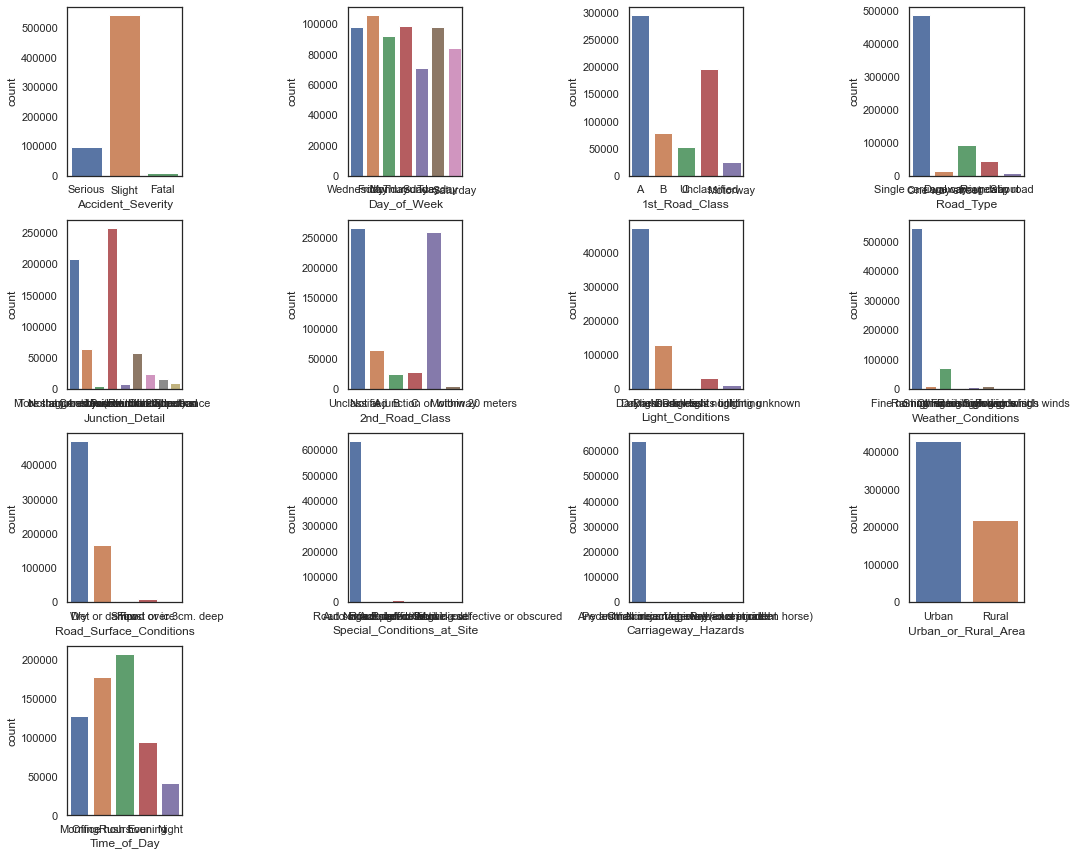

In [113]:
fig = plt.figure(figsize=(15,12))
ax1 = plt.subplot(441)
sns.countplot(accidents_df['Accident_Severity'])
ax2 = plt.subplot(442)
sns.countplot(accidents_df['Day_of_Week'])
ax3 = plt.subplot(443)
sns.countplot(accidents_df['1st_Road_Class'])
ax4 = plt.subplot(444)
sns.countplot(accidents_df['Road_Type'])
ax5 = plt.subplot(445)
sns.countplot(accidents_df['Junction_Detail'])
ax6 = plt.subplot(446)
sns.countplot(accidents_df['2nd_Road_Class'])
ax7 = plt.subplot(447)
sns.countplot(accidents_df['Light_Conditions'])
ax8 = plt.subplot(448)
sns.countplot(accidents_df['Weather_Conditions'])
ax9 = plt.subplot(449)
sns.countplot(accidents_df['Road_Surface_Conditions'])
ax10 = plt.subplot(4,4,10)
sns.countplot(accidents_df['Special_Conditions_at_Site'])
ax11 = plt.subplot(4,4,11)
sns.countplot(accidents_df['Carriageway_Hazards'])
ax12 = plt.subplot(4,4,12)
sns.countplot(accidents_df['Urban_or_Rural_Area'])
ax13 = plt.subplot(4,4,13)
sns.countplot(accidents_df['Time_of_Day'])
plt.tight_layout()
plt.show()

In [114]:
accidents_df = accidents_df.drop(columns=['Special_Conditions_at_Site', 'Carriageway_Hazards'])

In [115]:
accidents_df.Light_Conditions.value_counts(normalize=True)

Daylight                       0.727956
Darkness - lights lit          0.200164
Darkness - no lighting         0.049813
Darkness - lighting unknown    0.016103
Darkness - lights unlit        0.005964
Name: Light_Conditions, dtype: float64

In [116]:
def was_daylight(condition):
    if condition == 'Daylight':
        return 'Yes'
    else:
        return 'No'

In [117]:
accidents_df['Was_Daylight'] = accidents_df['Light_Conditions'].apply(was_daylight)

In [118]:
accidents_df.Weather_Conditions.value_counts(normalize=True)

Fine no high winds       0.840448
Raining no high winds    0.107624
Other                    0.016843
Raining + high winds     0.012683
Fine + high winds        0.011700
Fog or mist              0.004983
Snowing no high winds    0.004566
Snowing + high winds     0.001152
Name: Weather_Conditions, dtype: float64

In [119]:
def was_bad_weather(condition):
    if condition == 'Fine no high winds':
        return 'No'
    else:
        return 'Yes'

In [120]:
accidents_df['Was_Bad_Weather'] = accidents_df['Weather_Conditions'].apply(was_bad_weather)

In [121]:
accidents_df.Road_Surface_Conditions.value_counts(normalize=True)

Dry                     0.724585
Wet or damp             0.256415
Frost or ice            0.013635
Snow                    0.004179
Flood over 3cm. deep    0.001186
Name: Road_Surface_Conditions, dtype: float64

In [122]:
def was_road_dry(condition):
    if condition == 'Dry':
        return 'Yes'
    else:
        return 'No'

In [123]:
accidents_df['Was_Road_Dry'] = accidents_df['Road_Surface_Conditions'].apply(was_road_dry)

In [124]:
accidents_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Location_Easting_OSGR,648208.0,457684.471736,88611.341073,90185.000000,398206.750000,459530.500000,528820.000000,655391.000000
Location_Northing_OSGR,648208.0,263312.280412,122443.236168,10290.000000,174840.000000,217436.000000,366841.250000,656404.000000
Longitude,648208.0,-1.164207,1.282775,-6.317417,-2.027918,-1.121212,-0.142525,1.759641
Latitude,648208.0,52.257879,1.105293,49.912941,51.460000,51.842163,53.193894,55.800956
Number_of_Vehicles,648208.0,1.843288,0.712747,1.000000,1.000000,2.000000,2.000000,67.000000
Number_of_Casualties,648208.0,1.327304,0.804570,1.000000,1.000000,1.000000,1.000000,93.000000
Speed_limit,648208.0,37.858172,13.849555,0.000000,30.000000,30.000000,40.000000,70.000000
Hour,648208.0,13.549365,5.101049,0.000000,10.000000,14.000000,17.000000,23.000000


In [125]:
accidents_df[accidents_df['Speed_limit']<=10]

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,...,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,LSOA_of_Accident_Location,Hour,Two_Hour_Groupings,Time_of_Day,Was_Daylight,Was_Bad_Weather,Was_Road_Dry
286929,201501CW11286,527880.0,180840.0,-0.158577,51.512023,Slight,2,1,2015-08-12,Wednesday,...,Fine no high winds,Dry,Urban,E01004689,18,6pm-8pm,Rush hour,Yes,No,Yes
307781,201501YE80704,529330.0,192460.0,-0.133423,51.616118,Slight,1,1,2015-09-23,Wednesday,...,Fine no high winds,Dry,Urban,E01001534,15,2pm-4pm,Rush hour,Yes,No,Yes
406293,2015521507211,361824.0,173552.0,-2.550877,51.459648,Slight,2,1,2015-08-13,Thursday,...,Fine no high winds,Dry,Urban,E01014681,21,8pm-10pm,Evening,No,No,Yes


In [126]:
# Dropping the three accidents with 0 or 10 mph, as this may be data entry error
accidents_df = accidents_df.drop(accidents_df[accidents_df.Speed_limit < 20].index)

# Converting to integers
accidents_df.Speed_limit = accidents_df.Speed_limit.astype('int64')

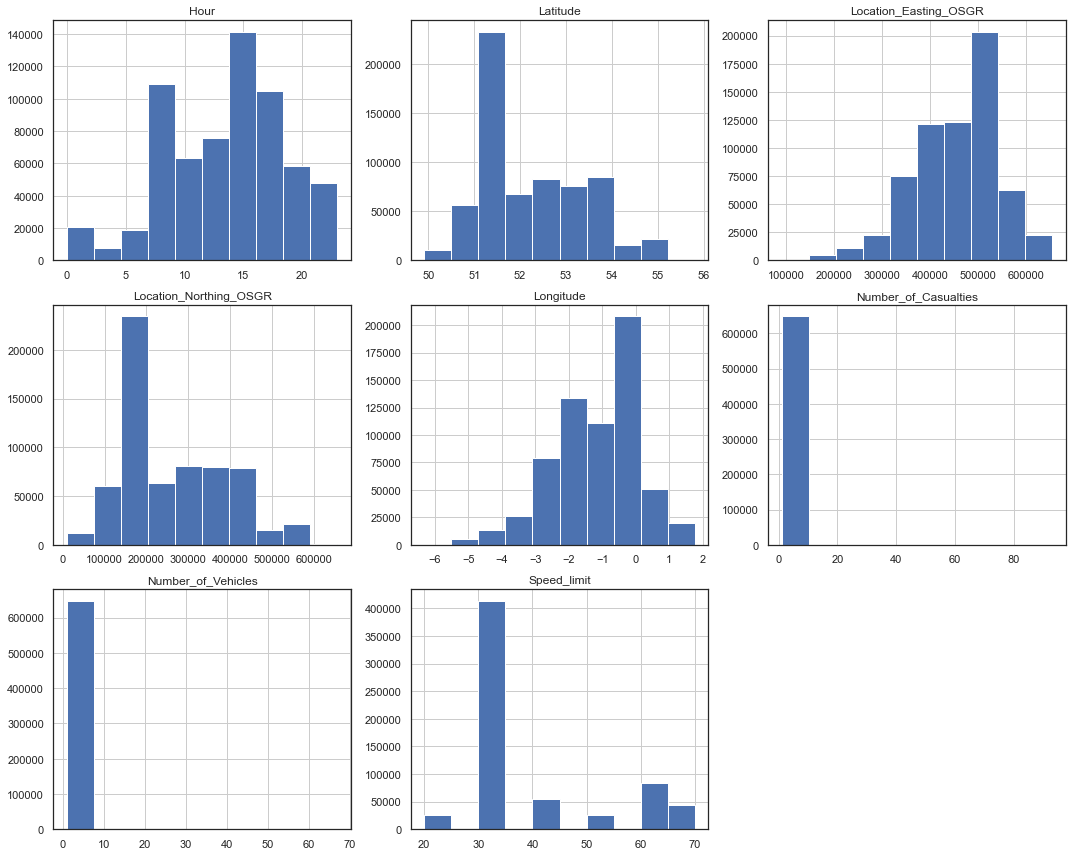

In [127]:
accidents_df.hist(figsize=(15,12))
plt.tight_layout()
plt.show()

In [128]:
accidents_df['log_Number_of_Casualties'] = np.log(accidents_df.Number_of_Casualties)
accidents_df['log_Number_of_Vehicles'] = np.log(accidents_df.Number_of_Vehicles)

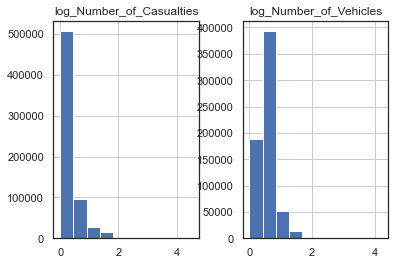

In [129]:
accidents_df[['log_Number_of_Casualties', 'log_Number_of_Vehicles']].hist()
plt.show()

Collinearity -

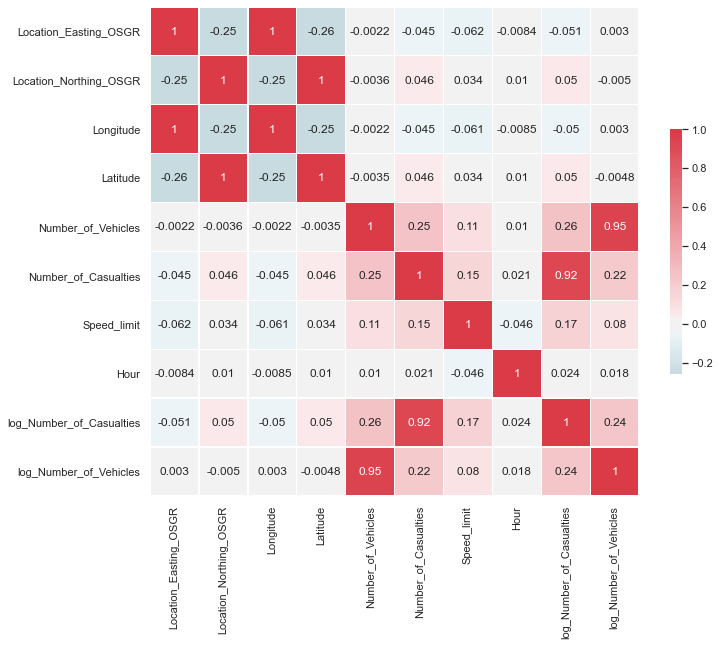

In [130]:
# Set the style of the visualization
sns.set(style="white")

# Create a covariance matrix
corr = accidents_df.corr()

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11,9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True);

In [131]:
accidents_df.to_csv('Data/01. Accidents/Cleaned_accidents.csv')